In [1]:
from auditory_stimulation.auditory_stimulus.helper.load_wav_as_numpy_array import load_wav_as_numpy_array
from auditory_stimulation.auditory_stimulus.helper.sound_players import psychopy_player
from auditory_stimulation.auditory_stimulus.noise_tagging_stimulus import NoiseTaggingStimulus

pygame 2.5.2 (SDL 2.28.2, Python 3.8.18)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# audio = load_wav_as_numpy_array("../test_sounds/test.wav")
audio = load_wav_as_numpy_array("../test_sounds/440.wav")

In [4]:
stim = NoiseTaggingStimulus(audio,
                            [(2, 6)],
                            psychopy_player,
                            140,
                            255)

In [5]:
stim.create()

In [6]:
stim.present()

In [7]:
modified = stim.modified_audio.audio
modified_spectrum = np.abs(np.real(np.fft.fftshift(np.fft.fft(modified[2 * audio.sampling_frequency : 6 * audio.sampling_frequency, 1]))))
original_spectrum = np.abs(np.real(np.fft.fftshift(np.fft.fft(audio.audio[2 * audio.sampling_frequency : 6 * audio.sampling_frequency, 1]))))

In [8]:
print(audio.sampling_frequency / modified_spectrum.shape[0])

0.25


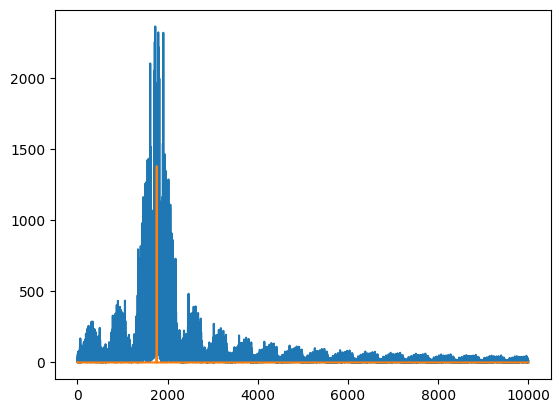

In [9]:
plt.plot(modified_spectrum[len(modified_spectrum) // 2 : len(modified_spectrum) // 2 + 10000])
plt.plot(original_spectrum[len(original_spectrum) // 2 : len(original_spectrum) // 2 + 10000])
plt.show()